# LeafNet-Res: Advanced Plant Species Classification Using Deep Residual Networks for Tropical and Medicinal Leaves
---


A modular, A100 GPU-ready PyTorch notebook for highly accurate plant leaf classification using ResNet101/152.

## **Phase 0: Environment Setup**

In [1]:
# Ensure GPU is available
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name() if torch.cuda.is_available() else "CPU")


CUDA available: True
Device name: NVIDIA A100-SXM4-40GB


## **Phase 1: Install & Import Libraries**

In [2]:
# Install if missing
!pip install -q torch torchvision scikit-learn tqdm




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 113.4 MB/s eta 0:00:00


In [2]:
# Imports
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from PIL import Image

## **Phase 2: Data Loading and Exploration**

In [3]:
# Upload kaggle.json to Colab
!pip install -q kaggle
from google.colab import files
files.upload() # upload your kaggle.json here

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset (change this to your dataset if needed)
!kaggle datasets download -d ahilaprem/mepco-tropic-leaf
!unzip -q mepco-tropic-leaf.zip

# Set data path
data_dir = "/content/MepcoTropicLeaf-V1/Database"

# Check classes
dataset = datasets.ImageFolder(root=data_dir)
class_names = dataset.classes
num_classes = len(class_names)
print("Classes:", class_names)
print("Number of Classes:", num_classes)


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/ahilaprem/mepco-tropic-leaf
License(s): unknown
 99% 2.96G/2.99G [00:05<00:00, 506MB/s]
100% 2.99G/2.99G [00:05<00:00, 557MB/s]
Classes: ['Asthma Plant.zip', 'Avaram.zip', 'Balloon vine.zip', 'Bellyache bush (Green).zip', 'Benghal dayflower.zip', 'Big Caltrops.zip', 'Black-Honey Shrub.zip', 'Bristly Wild Grape.zip', 'Butterfly Pea.zip', 'Cape Gooseberry.zip', 'Common Wireweed.zip', 'Country Mallow.zip', 'Crown flower.zip', 'Green Chireta.zip', 'Holy Basil.zip', 'Indian CopperLeaf.zip', 'Indian Jujube.zip', 'Indian Sarsaparilla.zip', 'Indian Stinging Nettle.zip', 'Indian Thornapple.zip', 'Indian wormwood.zip', 'Ivy Gourd.zip', 'Kokilaksha.zip', 'Land Caltrops (Bindii).zip', 'Madagascar Periwinkle.zip', 'Madras Pea Pumpkin.zip', 'Malabar Catmint.zip', 'Mexican Mint.zip', 'Mexican Prickly Poppy.zip', 'Mountain Knotgrass.zip', 'Nalta Jute.zip', 'Night blooming Cereus.zip', 'Panicled Foldwing.zip', 'Prickly Chaff

In [4]:
# Set data path
data_dir = "/content/MepcoTropicLeaf-V1/Database"

# Check classes
dataset = datasets.ImageFolder(root=data_dir)
class_names = dataset.classes
num_classes = len(class_names)
print("Classes:", class_names)
print("Number of Classes:", num_classes)


Classes: ['Asthma Plant.zip', 'Avaram.zip', 'Balloon vine.zip', 'Bellyache bush (Green).zip', 'Benghal dayflower.zip', 'Big Caltrops.zip', 'Black-Honey Shrub.zip', 'Bristly Wild Grape.zip', 'Butterfly Pea.zip', 'Cape Gooseberry.zip', 'Common Wireweed.zip', 'Country Mallow.zip', 'Crown flower.zip', 'Green Chireta.zip', 'Holy Basil.zip', 'Indian CopperLeaf.zip', 'Indian Jujube.zip', 'Indian Sarsaparilla.zip', 'Indian Stinging Nettle.zip', 'Indian Thornapple.zip', 'Indian wormwood.zip', 'Ivy Gourd.zip', 'Kokilaksha.zip', 'Land Caltrops (Bindii).zip', 'Madagascar Periwinkle.zip', 'Madras Pea Pumpkin.zip', 'Malabar Catmint.zip', 'Mexican Mint.zip', 'Mexican Prickly Poppy.zip', 'Mountain Knotgrass.zip', 'Nalta Jute.zip', 'Night blooming Cereus.zip', 'Panicled Foldwing.zip', 'Prickly Chaff Flower.zip', 'Punarnava.zip', 'Purple Fruited Pea Eggplant.zip', 'Purple Tephrosia.zip', 'Rosary Pea.zip', 'Shaggy button weed.zip', 'Small Water Clover.zip', 'Spiderwisp.zip', 'Square Stalked Vine.zip', 'S

## **Phase 3: Data Augmentation and Preprocessing**

In [5]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomAffine(30),
        transforms.RandomResizedCrop((224,224)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        normalize
    ]),
    'val': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
    'test': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ])
}

full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms['train'])
n_total = len(full_dataset)
n_train = int(n_total * 0.75)
n_val = int(n_total * 0.15)
n_test = n_total - n_train - n_val
train_set, val_set, test_set = random_split(full_dataset, [n_train, n_val, n_test])

# Adjust transforms for val/test
val_set.dataset.transform = data_transforms['val']
test_set.dataset.transform = data_transforms['test']

batch_size = 32
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)


## **Phase 4: Model Preparation (ResNet101/ResNet152)**

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Use ResNet152 (or swap for ResNet101)
model = models.resnet152(pretrained=True)
for param in model.parameters():
    param.requires_grad = True  # Fine-tune all layers

model.fc = nn.Sequential(
    nn.Linear(2048, 128),
    nn.LayerNorm(128),
    nn.ReLU(inplace=True),
    nn.Dropout(0.3),
    nn.Linear(128, num_classes)
)
model = model.to(device)
print(model)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## **Phase 5: Training Utilities**

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3, verbose=True)

def train_one_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss, running_corrects, total = 0.0, 0, 0
    for inputs, labels in tqdm(loader, desc="Training", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)
    return running_loss / total, running_corrects.double() / total

def eval_model(model, loader, criterion, device):
    model.eval()
    running_loss, running_corrects, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(loader, desc="Validating", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            total += labels.size(0)
    return running_loss / total, running_corrects.double() / total


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


## **Phase 6: Model Training Loop**

In [8]:
n_epochs = 25
best_acc = 0.0
train_losses, val_losses, train_accs, val_accs = [], [], [], []

for epoch in range(n_epochs):
    print(f'Epoch {epoch+1}/{n_epochs}')
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = eval_model(model, val_loader, criterion, device)
    scheduler.step(val_acc)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc.item())
    val_accs.append(val_acc.item())
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
    print(f'Val   Loss: {val_loss:.4f}, Val   Acc: {val_acc:.4f}')
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'leafnetres_best_model.pth')


Epoch 1/25


Train Loss: 2.3883, Train Acc: 0.6483
Val   Loss: 1.4175, Val   Acc: 0.9452
Epoch 2/25


Train Loss: 1.1048, Train Acc: 0.9785
Val   Loss: 0.8210, Val   Acc: 0.9876
Epoch 3/25


Train Loss: 0.7302, Train Acc: 0.9965
Val   Loss: 0.5720, Val   Acc: 0.9841
Epoch 4/25


Train Loss: 0.5449, Train Acc: 0.9965
Val   Loss: 0.4833, Val   Acc: 0.9753
Epoch 5/25


Train Loss: 0.4457, Train Acc: 0.9951
Val   Loss: 0.3347, Val   Acc: 0.9894
Epoch 6/25


Train Loss: 0.3742, Train Acc: 0.9933
Val   Loss: 0.3720, Val   Acc: 0.9647
Epoch 7/25


Train Loss: 0.3050, Train Acc: 0.9951
Val   Loss: 0.3860, Val   Acc: 0.9541
Epoch 8/25


Train Loss: 0.2760, Train Acc: 0.9912
Val   Loss: 0.2466, Val   Acc: 0.9770
Epoch 9/25


Train Loss: 0.2073, Train Acc: 0.9965
Val   Loss: 0.2908, Val   Acc: 0.9611
Epoch 10/25


Train Loss: 0.1740, Train Acc: 0.9968
Val   Loss: 0.1420, Val   Acc: 0.9947
Epoch 11/25


Train Loss: 0.1508, Train Acc: 0.9993
Val   Loss: 0.1669, Val   Acc: 0.9859
Epoch 12/25


Train Loss: 0.1332, Train Acc: 1.0000
Val   Loss: 0.1343, Val   Acc: 0.9912
Epoch 13/25


Train Loss: 0.1190, Train Acc: 1.0000
Val   Loss: 0.1281, Val   Acc: 0.9876
Epoch 14/25


Train Loss: 0.1108, Train Acc: 1.0000
Val   Loss: 0.1286, Val   Acc: 0.9876
Epoch 15/25


Train Loss: 0.1071, Train Acc: 1.0000
Val   Loss: 0.1203, Val   Acc: 0.9894
Epoch 16/25


Train Loss: 0.0966, Train Acc: 1.0000
Val   Loss: 0.1156, Val   Acc: 0.9894
Epoch 17/25


Train Loss: 0.0951, Train Acc: 1.0000
Val   Loss: 0.1104, Val   Acc: 0.9894
Epoch 18/25


Train Loss: 0.0906, Train Acc: 1.0000
Val   Loss: 0.1048, Val   Acc: 0.9912
Epoch 19/25


Train Loss: 0.0887, Train Acc: 1.0000
Val   Loss: 0.1085, Val   Acc: 0.9894
Epoch 20/25


Train Loss: 0.0849, Train Acc: 1.0000
Val   Loss: 0.1077, Val   Acc: 0.9876
Epoch 21/25


Train Loss: 0.0855, Train Acc: 1.0000
Val   Loss: 0.1163, Val   Acc: 0.9876
Epoch 22/25


Train Loss: 0.0809, Train Acc: 1.0000
Val   Loss: 0.1074, Val   Acc: 0.9859
Epoch 23/25


Train Loss: 0.0801, Train Acc: 1.0000
Val   Loss: 0.1094, Val   Acc: 0.9859
Epoch 24/25


Train Loss: 0.0802, Train Acc: 1.0000
Val   Loss: 0.1067, Val   Acc: 0.9876
Epoch 25/25


Train Loss: 0.0816, Train Acc: 1.0000
Val   Loss: 0.1059, Val   Acc: 0.9894


## **Phase 7: Metrics Evaluation and Insights**

Testing: 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]


Classification Report:
                                  precision    recall  f1-score   support

               Asthma Plant.zip       1.00      1.00      1.00         7
                     Avaram.zip       0.80      1.00      0.89         4
               Balloon vine.zip       1.00      1.00      1.00         8
     Bellyache bush (Green).zip       1.00      1.00      1.00        10
          Benghal dayflower.zip       1.00      1.00      1.00         9
               Big Caltrops.zip       1.00      0.86      0.92         7
          Black-Honey Shrub.zip       1.00      1.00      1.00        14
         Bristly Wild Grape.zip       1.00      0.88      0.93         8
              Butterfly Pea.zip       1.00      1.00      1.00         5
            Cape Gooseberry.zip       1.00      0.92      0.96        13
            Common Wireweed.zip       1.00      0.86      0.92         7
             Country Mallow.zip       1.00      1.00      1.00         5
               Crown flowe

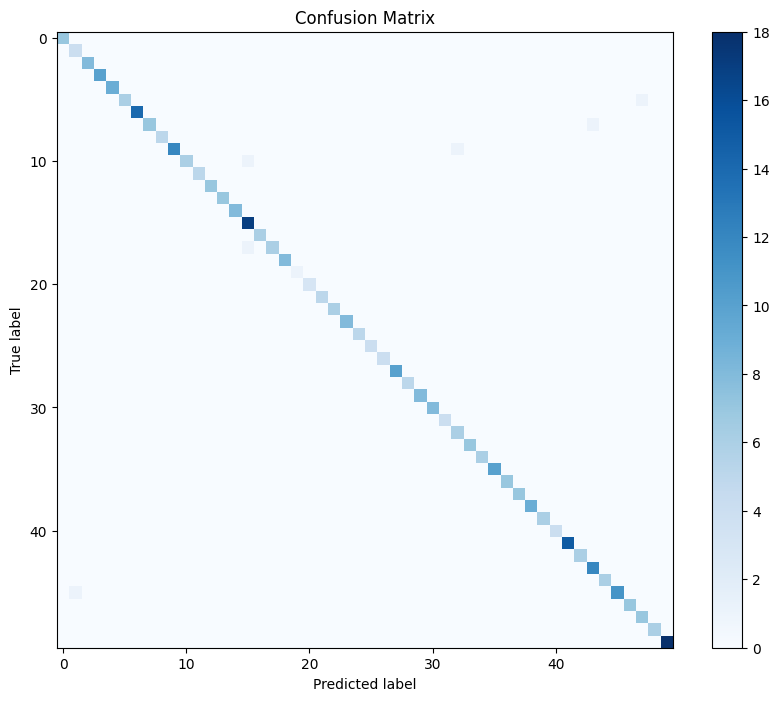

Test Set Accuracy: 0.9842


In [9]:
model.load_state_dict(torch.load('leafnetres_best_model.pth'))
model.eval()

y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc="Testing"):
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.tolist())
        y_pred.extend(preds.cpu().tolist())

report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", report)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

accuracy = np.mean(np.array(y_true) == np.array(y_pred))
print(f"Test Set Accuracy: {accuracy:.4f}")


## **Phase 8: Insights & Recommendations**

- Review confusion matrix to identify most confused classes.
- Use Grad-CAM (optional) to interpret model decisions.
- Consider data augmentation or ensembling for further boost.
- This workflow is ready for GPU, research, and production!
